Chapter 5: Exercise 8 (Except Part d)

In [1]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso, RidgeCV
from sklearn.decomposition import PCA
from statsmodels.tools import add_constant
import statsmodels.api as sm
import itertools

(a)

In [3]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

(b)

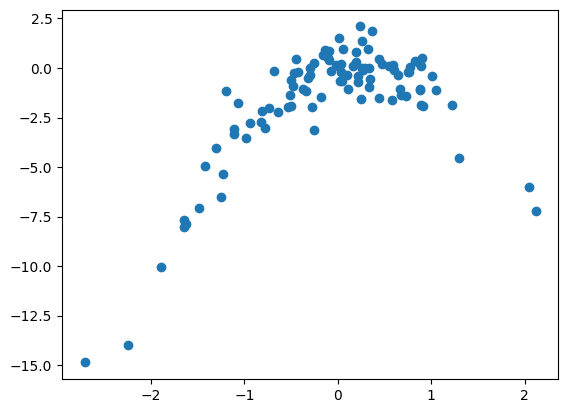

In [4]:
plt.scatter(x, y);

(c)

In [5]:
data = pd.DataFrame({'X': x, 'Y': y})

loo = LeaveOneOut()

def loocv_error(formula, data):
    errors = []
    for train_index, test_index in loo.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        model = sm.OLS.from_formula(formula, data=train_data).fit()
        prediction = model.predict(test_data)
        errors.append((test_data['Y'].values[0] - prediction) ** 2)
    return np.mean(errors)

models = {
    'Model 1': 'Y ~ X',
    'Model 2': 'Y ~ X + I(X**2)',
    'Model 3': 'Y ~ X + I(X**2) + I(X**3)',
    'Model 4': 'Y ~ X + I(X**2) + I(X**3) + I(X**4)'
}

loocv_errors = {name: loocv_error(formula, data) for name, formula in models.items()}

for model_name, error in loocv_errors.items():
    print(f"{model_name}: LOOCV Error = {error:.4f}")

Model 1: LOOCV Error = 6.6330
Model 2: LOOCV Error = 1.1229
Model 3: LOOCV Error = 1.3018
Model 4: LOOCV Error = 1.3324


(e) Model 2 ha the lowest LOOCV Error at 1.1229. Model 1 cannot capture the curve of the true relationship. Model 2 fits the data structure good and yieled the lowest error. Models 3 and 4 can be overfitting resulting in a higher error.

(f)

In [6]:
min_deg = 1  
max_deg = 4 + 1 

for i in range(min_deg, max_deg):
    pol = PolynomialFeatures(degree=i)
    X_pol = pol.fit_transform(data['X'].values.reshape(-1, 1))  # Create polynomial features
    y = data['Y']
    
    model = sm.OLS(y, X_pol)
    results = model.fit()
    
    print(f"Model with degree {i}:\n{results.summary()}\n")

Model with degree 1:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        02:06:11   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.24

These results agree with the conclusions drawn based on the cross-validation results.

Exercise 9 (Except part g and h)

In [7]:
Boston= pd.read_csv('Boston.csv') 
print(Boston.head(5))

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


(a)

In [8]:
mean_medv = Boston['medv'].mean()

print(f"Estimated population mean of medv (μˆ): {mean_medv:.2f}")

Estimated population mean of medv (μˆ): 22.53


(b)

In [9]:
std_dev_medv = Boston['medv'].std()

n = Boston['medv'].count()

standard_error = std_dev_medv / (n ** 0.5)

print(f"Estimated standard error of μˆ: {standard_error:.5f}")

Estimated standard error of μˆ: 0.40886


(c)

In [10]:
n_bootstrap = 1000
bootstrap_means = []
bootstrap_medians = []

for _ in range(n_bootstrap):
    sample = Boston['medv'].sample(frac=1, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_medians.append(sample.median())

bootstrap_standard_error = np.std(bootstrap_means)

print(f"Estimated standard error of μˆ using bootstrap: {bootstrap_standard_error:.5f}")

Estimated standard error of μˆ using bootstrap: 0.39929


(d)

In [11]:
confidence_interval = (mean_medv - 2 * bootstrap_standard_error, mean_medv + 2 * bootstrap_standard_error)

print(f"95% Confidence Interval for mean of medv: {confidence_interval}")

95% Confidence Interval for mean of medv: (np.float64(21.734234881408458), np.float64(23.331377766812896))


(e)

In [12]:
median_medv = Boston['medv'].median()

print(f"Estimated median value of medv (μˆmed): {median_medv:.2f}")

Estimated median value of medv (μˆmed): 21.20


(f)

In [13]:
bootstrap_standard_error_med = np.std(bootstrap_medians)

print(f"Estimated standard error of μˆmed using bootstrap: {bootstrap_standard_error_med:.2f}")

Estimated standard error of μˆmed using bootstrap: 0.38


The median value is relatively stable.

Chapter 6 Exercise 8 (Except part f)

(a)

In [14]:
np.random.seed(42)

n = 100

X = np.random.normal(loc=0, scale=1, size=n)

epsilon = np.random.normal(loc=0, scale=1, size=n)

(b)

In [15]:
beta_0 = 2.0   # Intercept
beta_1 = 3.0   # Coefficient for X
beta_2 = -1.5  # Coefficient for X^2
beta_3 = 0.5   # Coefficient for X^3

Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

(c)

In [16]:
data = pd.DataFrame({'X': X, 'Y': Y})
for degree in range(2, 11):
    data[f'X^{degree}'] = data['X'] ** degree

def forward_stepwise_selection(data, response):
    remaining_predictors = list(data.columns)
    remaining_predictors.remove(response)
    selected_predictors = []
    best_model = None
    best_cp = float('inf')

    while remaining_predictors:
        cp_values = {}
        for predictor in remaining_predictors:
            model_predictors = selected_predictors + [predictor]
            X_model = add_constant(data[model_predictors])
            model = sm.OLS(data[response], X_model).fit()
            n = X_model.shape[0]
            p = model.df_model + 1 
            mse = model.mse_resid
            cp = (model.ssr / mse) - (n - 2 * p)
            cp_values[predictor] = cp

        best_predictor = min(cp_values, key=cp_values.get)
        selected_predictors.append(best_predictor)
        remaining_predictors.remove(best_predictor)

        X_model = add_constant(data[selected_predictors])
        best_model = sm.OLS(data[response], X_model).fit()

        current_cp = cp_values[best_predictor]
        if current_cp < best_cp:
            best_cp = current_cp

    return best_model

final_model = forward_stepwise_selection(data, 'Y')

print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.95e-60
Time:                        02:22:06   Log-Likelihood:                -129.32
No. Observations:                 100   AIC:                             280.6
Df Residuals:                      89   BIC:                             309.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8694      0.196      9.543      0.0

(d)

In [17]:
data = pd.DataFrame({'X': X, 'Y': Y})
for degree in range(2, 11):
    data[f'X^{degree}'] = data['X'] ** degree

def backward_stepwise_selection(data, response):
    predictors = list(data.columns)
    predictors.remove(response)
    selected_predictors = predictors.copy()  
    best_model = sm.OLS(data[response], add_constant(data[selected_predictors])).fit()
    best_cp = (best_model.ssr / best_model.mse_resid) - (data.shape[0] - 2 * (best_model.df_model + 1))

    while selected_predictors:
        cp_values = {}
        for predictor in selected_predictors:
            model_predictors = selected_predictors.copy()
            model_predictors.remove(predictor)
            X_model = add_constant(data[model_predictors])
            model = sm.OLS(data[response], X_model).fit()
            n = X_model.shape[0]
            p = model.df_model + 1 
            mse = model.mse_resid
            cp = (model.ssr / mse) - (n - 2 * p)
            cp_values[predictor] = cp

        worst_predictor = max(cp_values, key=cp_values.get)

        if cp_values[worst_predictor] < best_cp:
            selected_predictors.remove(worst_predictor)
            best_model = sm.OLS(data[response], add_constant(data[selected_predictors])).fit()
            best_cp = cp_values[worst_predictor] 
        else:
            break

    return best_model

final_model_backward = backward_stepwise_selection(data, 'Y')

print(final_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                nan
Time:                        02:22:39   Log-Likelihood:                -296.91
No. Observations:                 100   AIC:                             595.8
Df Residuals:                      99   BIC:                             598.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2774      0.474      0.586      0.5

(e)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.441e-01, tolerance: 1.981e-01
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+00, tolerance: 1.981e-01
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

Optimal lambda: 0.0050


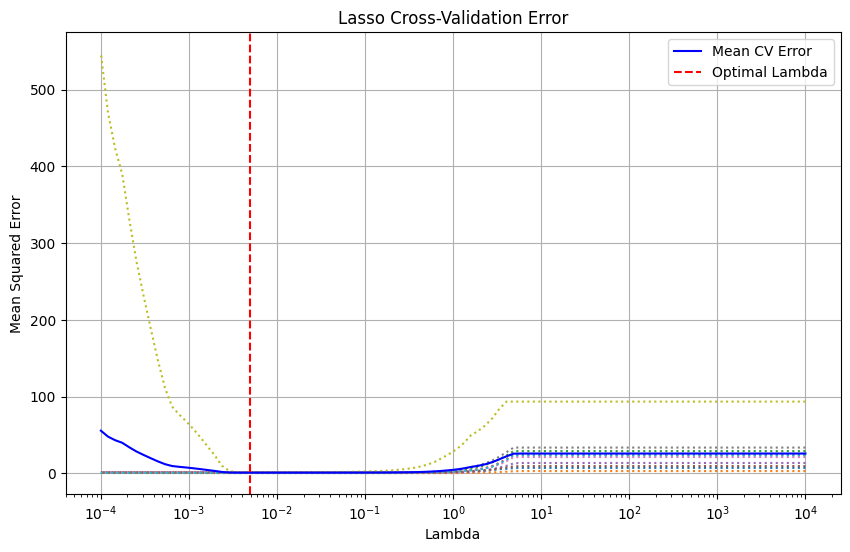

Lasso Coefficients:
1: 0.0000
X: 2.9059
X^2: -1.5080
X^3: 1.1146
X^4: -0.0000
X^5: -0.0000
X^6: -0.0000
X^7: 0.0000
X^8: -0.0000
X^9: 0.0000
X^10: -0.2950


In [18]:
data = pd.DataFrame({'X': X, 'Y': Y})
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(data[['X']])

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10)
lasso_cv.fit(X_train_scaled, y_train)

optimal_lambda = lasso_cv.alpha_
print(f"Optimal lambda: {optimal_lambda:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), 'b', label='Mean CV Error')
plt.axvline(optimal_lambda, linestyle='--', color='r', label='Optimal Lambda')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.legend()
plt.grid()
plt.show()

lasso_coefs = lasso_cv.coef_
print("Lasso Coefficients:")
for feature, coef in zip(poly.get_feature_names_out(), lasso_coefs):
    print(f"{feature}: {coef:.4f}")

Lasso has effectively eliminated terms X^4 and X^9 from the model which means they do not contribute significantly. A smaller Lamba value of 0.0050 allows more coefficients to be non-zero.

Chapter 6 Exercise 11 (Except PCR)

(a)

In [19]:
boston= pd.read_csv('Boston.csv') 
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


In [20]:
X = boston.drop(columns=['crim'])
y = boston['crim'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def best_subset_selection(X, y):
    best_aic = float('inf')
    best_model = None
    best_predictors = None

    for k in range(1, X.shape[1] + 1):
        for combo in itertools.combinations(X.columns, k):
            X_subset = sm.add_constant(X[list(combo)])
            model = sm.OLS(y, X_subset).fit()
            aic = model.aic
            
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_predictors = combo
                
    return best_model, best_predictors

best_model, best_predictors = best_subset_selection(X_train, y_train)

print("Best Subset Model Summary:")
print(best_model.summary())
print(f"Selected Predictors: {best_predictors}")

Best Subset Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     49.00
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           6.10e-45
Time:                        02:31:49   Log-Likelihood:                -1342.8
No. Observations:                 404   AIC:                             2700.
Df Residuals:                     397   BIC:                             2728.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5072    

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10)
lasso_cv.fit(X_train_scaled, y_train)

optimal_lambda = lasso_cv.alpha_
print(f"Optimal Lambda for Lasso: {optimal_lambda:.4f}")

Optimal Lambda for Lasso: 0.0464


In [22]:
lasso_coefs = lasso_cv.coef_
print("Lasso Coefficients:")
for feature, coef in zip(X.columns, lasso_coefs):
    print(f"{feature}: {coef:.4f}")

Lasso Coefficients:
Unnamed: 0: -0.0491
zn: 0.8226
indus: -0.1822
chas: -0.2364
nox: -1.0221
rm: 0.3728
age: 0.1563
dis: -1.8315
rad: 4.9060
tax: -0.0000
ptratio: -0.5685
lstat: 0.2483
medv: -2.0301


In [25]:
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100))
ridge_cv.fit(X_train_scaled, y_train)

optimal_lambda_ridge = ridge_cv.alpha_
print(f"Optimal Lambda for Ridge: {optimal_lambda_ridge:.4f}")

ridge_coefs = ridge_cv.coef_
print("Ridge Coefficients:")
for feature, coef in zip(X.columns, ridge_coefs):
    print(f"{feature}: {coef:.4f}")

Optimal Lambda for Ridge: 5.8570
Ridge Coefficients:
Unnamed: 0: -0.0857
zn: 0.9123
indus: -0.2437
chas: -0.2659
nox: -1.1763
rm: 0.4803
age: 0.2369
dis: -1.9891
rad: 4.9656
tax: -0.0610
ptratio: -0.6257
lstat: 0.3416
medv: -2.1447


Lasso and ridge regression help manage overfitting. There is a moderate amount of variance in the crime rate.

(b)

In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=10),
    'Ridge Regression': RidgeCV(cv=10),
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    rmse = np.sqrt(-scores.mean())
    results[name] = rmse
    print(f"{name}: RMSE (Cross-Validation) = {rmse:.4f}")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: Test RMSE = {test_rmse:.4f}")

Linear Regression: RMSE (Cross-Validation) = 6.8654
Lasso Regression: RMSE (Cross-Validation) = 6.9191
Ridge Regression: RMSE (Cross-Validation) = 6.8788
Linear Regression: Test RMSE = 5.0390
Lasso Regression: Test RMSE = 5.1776
Ridge Regression: Test RMSE = 5.0118


Ridge regression performed the best on the test set and linear regression also performed well. Lasso regression may not capture the best predictive power.

(c) Ridge regression includes all features in the dataset which shrinks coefficients but none of them are zero.